<a href="https://colab.research.google.com/github/atopatalos/Repository_Project_dibimbing/blob/main/PR_day15_RFM_analysis_Patalo_Paul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Poin-poin Assignment
1. Datasets: https://drive.google.com/file/d/1oZKjctosUWBoFpMi99Zavdhijf3n0Go_/view?usp=sharing
2. Objective: Established the RFM (Recency, Frequency, Monetize Model)

# **Preparation**

In [ ]:
# Library Import

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
%matplotlib inline

In [ ]:
# Regresi california_dataset
path = '/content/flight.csv'

df = pd.read_csv(path)
df.shape

(62988, 23)

## Data Dictionary
1. member_no : ID Member
2. ffp_date : Frequent Flyer Program Join Date
3. first_flight_date : Frist Flight Date
4. gender : Gender
5. ffp_tier : Tier of Frequent Flyer Program
6. work_city : City
7. work_province : Province
8. work_country : Country
9. age : Customer Age
10. load_time : The date data was retrieved
11. flight_count : Customer flight count
12. bp_sum : Flight plan
13. sum_yr_1 : Fare revenue
14. sum_yr_2 : Votes prices
15. seg_km_sum : Total disctance (km) traveled
16. last_flight_date : Last flight date
17. last_to_end : Distance of the last flight to the last airline company
18. avg_interval : Averange time distance
19. max_interval : Maximum time intervals
20. exchange_count :Exchange amount
21. avg_discount : Averange discount
22. points_sum : Customer point
23. point_notflight : Not used customer point

# **Assignment 1. Data Understanding**


In [ ]:
# Get the datatypes and amount of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df.head(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,...,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15
6,44924,3/22/2006,3/29/2006,Male,6,wulumuqishi,xinjiang,CN,46.0,3/31/2014,...,114469.0,287042,3/31/2014,1,7.190000,28,20,0.965347,298873,29
7,22631,4/9/2010,4/9/2010,Female,6,wenzhoushi,zhejiang,CN,50.0,3/31/2014,...,114971.0,287230,3/29/2014,3,10.111111,45,7,0.962070,351198,14
8,32197,6/7/2011,7/1/2011,Male,5,DRANCY,NaN,FR,50.0,3/31/2014,...,87401.0,321489,3/26/2014,6,13.054545,94,5,0.828478,295158,7
9,31645,7/5/2010,7/5/2010,Female,6,wenzhou,zhejiang,CN,43.0,3/31/2014,...,60267.0,375074,3/17/2014,15,11.333333,73,13,0.708010,251907,16


In [ ]:
df.tail(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
62978,22761,4/14/2011,4/14/2011,Male,4,shantou,guangdongsheng,CN,48.0,3/31/2014,...,370.0,760,6/24/2013,282,0.0,0,0,0.28,0,0
62979,34330,3/16/2013,3/17/2013,Male,4,wulumuqi,xinjiang,CN,41.0,3/31/2014,...,0.0,746,3/19/2013,379,2.0,2,0,0.25,0,0
62980,1761,8/7/2012,9/9/2012,Female,4,shenzhen,guangdong,CN,29.0,3/31/2014,...,0.0,6138,9/21/2012,558,12.0,12,0,0.00,0,0
62981,15206,12/2/2011,12/2/2011,Female,4,guangzhou,guangdong,CN,42.0,3/31/2014,...,0.0,2158,10/6/2013,178,3.0,3,0,0.00,0,0
62982,16415,1/20/2013,1/20/2013,Female,4,beijing,.,CN,35.0,3/31/2014,...,0.0,3848,1/20/2013,437,0.0,0,0,0.00,0,0
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.0,4,1,0.00,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.0,60,14,0.00,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.0,166,0,0.00,0,0
62986,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,0.0,3934,2/26/2013,400,12.0,12,0,0.00,0,0
62987,61340,2/17/2013,2/17/2013,Female,4,shanghai,.,CN,29.0,3/31/2014,...,0.0,4222,2/23/2013,403,6.0,6,0,0.00,0,0


In [ ]:
# Describe
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [ ]:
# Count unique values
n_unique_values = df['MEMBER_NO'].nunique()

# Print the result
print(f"Number of unique values in 'MEMBER_NO': {n_unique_values}")

Number of unique values in 'MEMBER_NO': 62988


## ***Findings:***


*   Features : FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE should have the type of DATE instead of OBJECT.
*   The dataset has 69288 rows and 23 columns including the MEMBER_NO
*   The column MEMBER_NO is the primary key since it has unique value amount of 69288; the same as the number of rows





# **Assignment 2:**


1.   Top Cities, Countries with highest flight number
2.   Top Member with highest Total Points of flight
2.   Top Member with highest sum_yr_1 : Fare revenue
3.   List item
4.   List item




In [ ]:
#Making function to visualize top 20 products and top 5 countries
def plot(df, column_name, n=20): #default n = 20, we can customize it.
    top = df[column_name].value_counts().head(n)
    ax = top.plot(kind='barh', figsize=(8, 6))
    plt.grid(False)

    # Adding value on each bar
    for i, v in enumerate(top):
        ax.text(v, i, str(v), ha='left', va='center')

Text(0.5, 1.0, 'Top 10 cities highest Amount of Members ')

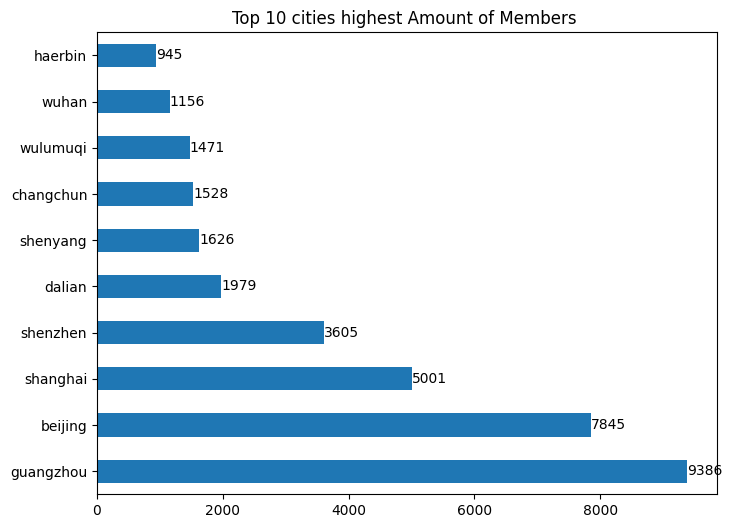

In [ ]:
#Showing top 10 Cities
plot(df, 'WORK_CITY', n=10)
plt.title("Top 10 cities highest Amount of Members ")

Text(0.5, 1.0, 'Top 10 Countries highest Amount of Members ')

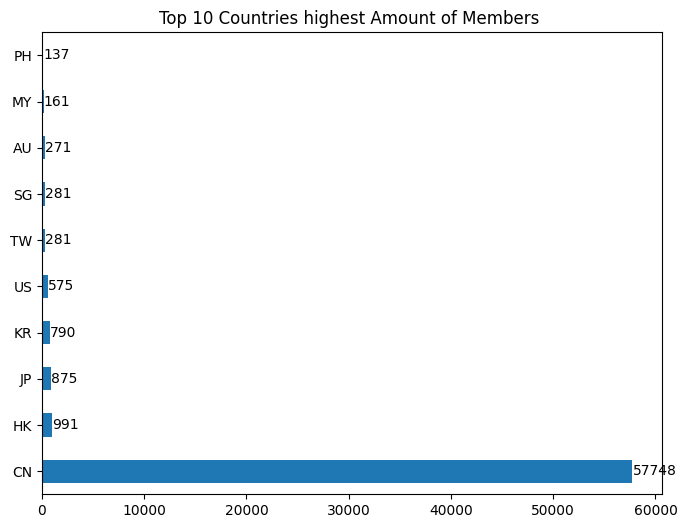

In [ ]:
#Showing top 10 Countries
plot(df, 'WORK_COUNTRY', n=10)
plt.title("Top 10 Countries highest Amount of Members ")

In [ ]:
#Create total_price column
#df['total_points'] = df['Quantity'] * df['UnitPrice']
df.groupby('MEMBER_NO').agg(Total_Points=('Points_Sum','sum')).reset_index().sort_values('Total_Points',ascending=False).head(20)

,MEMBER_NO,Total_Points
45424,45425,985572
45074,45075,795398
62782,62783,647113
54992,54993,619760
8967,8968,502044
28064,28065,415768
55105,55106,406361
21188,21189,372204
37993,37994,353101
22630,22631,351198


In [ ]:
top20_customer_points = (df
            .groupby('MEMBER_NO')
            .agg(Total_Points=('Points_Sum','sum'))
            .reset_index()
            .sort_values('Total_Points',ascending=False)
            .head(20)
            )

top20_customer_points

,MEMBER_NO,Total_Points
45424,45425,985572
45074,45075,795398
62782,62783,647113
54992,54993,619760
8967,8968,502044
28064,28065,415768
55105,55106,406361
21188,21189,372204
37993,37994,353101
22630,22631,351198


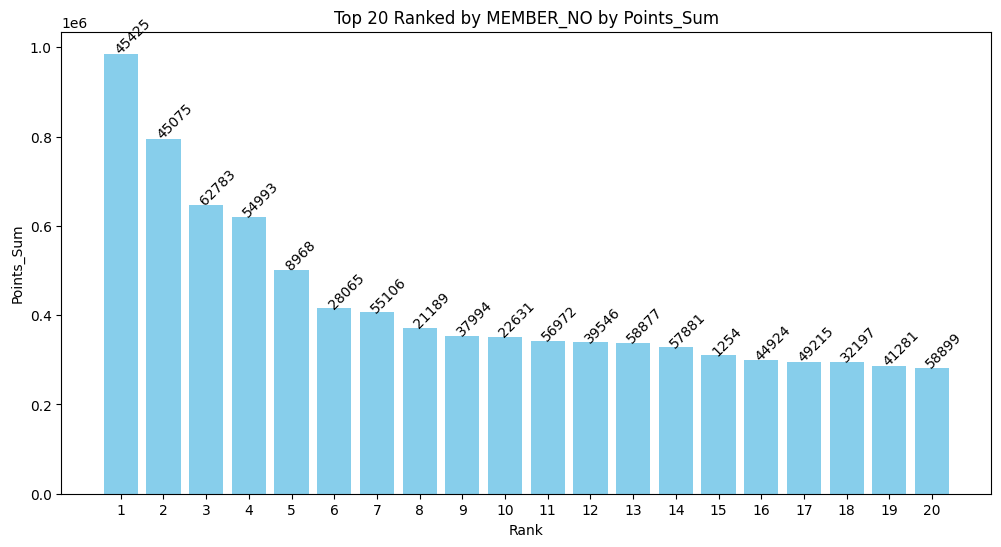

In [ ]:
# Put into a new dataframe
# Plot
top20_customer_points = df.sort_values(by='Points_Sum', ascending=False).head(20)


plt.figure(figsize=(12, 6))
bars = plt.bar(range(1, 21), top20_customer_points['Points_Sum'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Points_Sum')
plt.title('Top 20 Ranked by MEMBER_NO by Points_Sum')
plt.xticks(range(1, 21))

# Adding MEMBER_NO labels on the bars
for bar, member_no in zip(bars, top20_customer_points['MEMBER_NO']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 200, str(member_no), rotation=45)

nums = df.select_dtypes(include=[np.number], exclude=[np.bool]).columns
cats = df.select_dtypes(exclude=[np.number]).columnsplt.show()

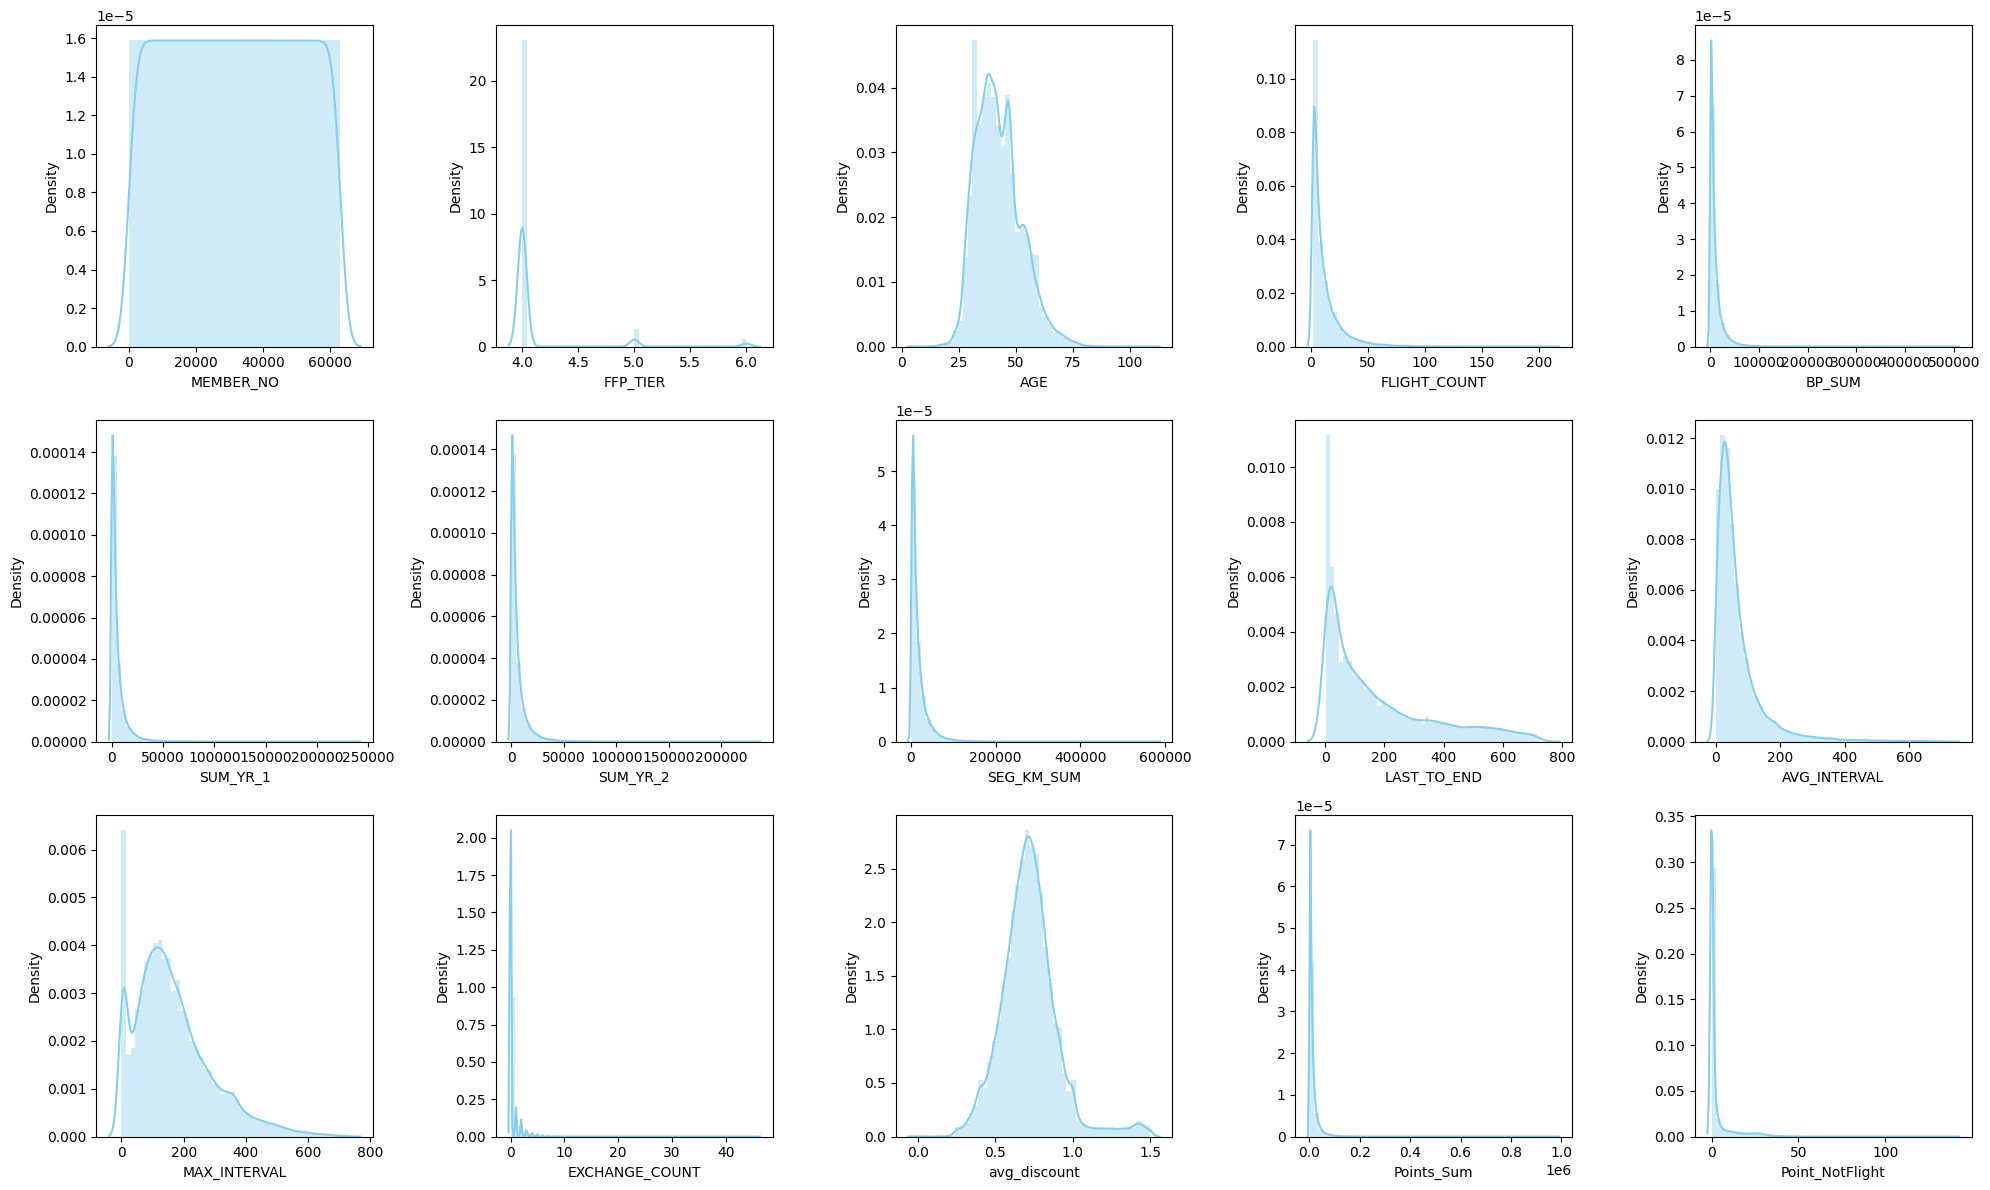

In [ ]:
# Check the features with type of numerical
nums = df.select_dtypes(include=[np.number], exclude=[bool]).columns
cats = df.select_dtypes(exclude=[np.number]).columns

plt.figure(figsize=(20,12))

for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

## ***Findings:***


*   Most of the features are skewed to the right. These will need standardization.
*   Feature "AVG_DISCOUNT" is almost in the form of normal distribution.
*   Feature "FFP_TIER" is definitely a Categorical type with three different types.

### Assignment 3 : Lakukan Feature Egnineering
1. Drop duplikat
2. Cek missing value
3. Ubah tipe data jika tidak sesuai, misal seharusnya datetime tapi object, maka ubah object menjadi datetime.
4. Lakukan StandarScaller untuk feature scalling
5. Handling outlier, dan teknik feature engineering lainnya jika diperlukan
* unsupervised tidak perlu splitting data


In [ ]:
# Check Missing Values
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
# Count missing values
# Calculate the percentage of missing values
null_values = df.isnull().sum()

percentage_null = (null_values / len(df)) * 100

# Create a new DataFrame to display the results
missing_data_summary = pd.DataFrame({
    'Column': null_values.index,
    'NULL Values': null_values.values,
    'Percent NULL': percentage_null.values.round(2)
})

# Print the missing data summary
print("Missing Data Summary:")
print(missing_data_summary)

Missing Data Summary:
               Column  NULL Values  Percent NULL
0           MEMBER_NO            0          0.00
1            FFP_DATE            0          0.00
2   FIRST_FLIGHT_DATE            0          0.00
3              GENDER            3          0.00
4            FFP_TIER            0          0.00
5           WORK_CITY         2269          3.60
6       WORK_PROVINCE         3248          5.16
7        WORK_COUNTRY           26          0.04
8                 AGE          420          0.67
9           LOAD_TIME            0          0.00
10       FLIGHT_COUNT            0          0.00
11             BP_SUM            0          0.00
12           SUM_YR_1          551          0.87
13           SUM_YR_2          138          0.22
14         SEG_KM_SUM            0          0.00
15   LAST_FLIGHT_DATE            0          0.00
16        LAST_TO_END            0          0.00
17       AVG_INTERVAL            0          0.00
18       MAX_INTERVAL            0          0.0

In [ ]:
#replace missing value with median
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())

In [ ]:
# Check Missing Values 2nd round
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                     0
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1                0
SUM_YR_2                0
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
# Drop rows which have NULL values in WORK_CITY, WORK_PROVINCE, WORK_COUNTRY
# Since for WORK_COUNTRY large percentage is in CHINA
df_2 = df.dropna()

In [ ]:
# Re-Check again the missing value
from sklearn.preprocessing import StandardScaler
import pandas as pd
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59236 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          59236 non-null  int64  
 1   FFP_DATE           59236 non-null  object 
 2   FIRST_FLIGHT_DATE  59236 non-null  object 
 3   GENDER             59236 non-null  object 
 4   FFP_TIER           59236 non-null  int64  
 5   WORK_CITY          59236 non-null  object 
 6   WORK_PROVINCE      59236 non-null  object 
 7   WORK_COUNTRY       59236 non-null  object 
 8   AGE                59236 non-null  float64
 9   LOAD_TIME          59236 non-null  object 
 10  FLIGHT_COUNT       59236 non-null  int64  
 11  BP_SUM             59236 non-null  int64  
 12  SUM_YR_1           59236 non-null  float64
 13  SUM_YR_2           59236 non-null  float64
 14  SEG_KM_SUM         59236 non-null  int64  
 15  LAST_FLIGHT_DATE   59236 non-null  object 
 16  LAST_TO_END        592

In [ ]:
df_2.head(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,...,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15
6,44924,3/22/2006,3/29/2006,Male,6,wulumuqishi,xinjiang,CN,46.0,3/31/2014,...,114469.0,287042,3/31/2014,1,7.190000,28,20,0.965347,298873,29
7,22631,4/9/2010,4/9/2010,Female,6,wenzhoushi,zhejiang,CN,50.0,3/31/2014,...,114971.0,287230,3/29/2014,3,10.111111,45,7,0.962070,351198,14
9,31645,7/5/2010,7/5/2010,Female,6,wenzhou,zhejiang,CN,43.0,3/31/2014,...,60267.0,375074,3/17/2014,15,11.333333,73,13,0.708010,251907,16
10,58877,11/18/2010,11/20/2010,Female,6,PARIS,PARIS,FR,34.0,3/31/2014,...,91581.0,262013,3/10/2014,22,16.833333,95,1,0.988658,337839,3
11,37994,11/13/2004,12/2/2004,Male,6,beijing,.,CN,47.0,3/31/2014,...,126821.0,271438,3/26/2014,6,5.027778,42,15,0.952535,353101,66


## Data Dictionary
1. member_no : ID Member
2. ffp_date : Frequent Flyer Program Join Date
3. first_flight_date : Frist Flight Date
4. gender : Gender
5. ffp_tier : Tier of Frequent Flyer Program
6. work_city : City
7. work_province : Province
8. work_country : Country
9. age : Customer Age
10. load_time : The date data was retrieved
11. flight_count : Customer flight count
12. bp_sum : Flight plan
13. sum_yr_1 : Fare revenue
14. sum_yr_2 : Votes prices
15. seg_km_sum : Total disctance (km) traveled
16. last_flight_date : Last flight date
17. last_to_end : Distance of the last flight to the last airline company
18. avg_interval : Averange time distance
19. max_interval : Maximum time intervals
20. exchange_count :Exchange amount
21. avg_discount : Averange discount
22. points_sum : Customer point
23. point_notflight : Not used customer point

# **Assignment 4. RFM with K-Means**
1. RFM Analysis are used by marketing team to improve the marketing strategy based on  insights from existing datasets. We would suggest the following inputs :
- Recency (R) =  LAST_TO_END : the length of a passenger's most reent purchase to observation window. A smaller number means they flew more recently (the smaller the better)
- Frequency (F) = FLIGHT_COUNT : the passenger's purchase frequency within a certain period of time. A bigger number means they flew more frequently (the bigger the better)
- Monetary (M) =  SEG_KM_SUM :

2. Perform Standardization on each numerical features
3. Outlier handling
4. Perform Elbow method

In [ ]:
data = df_2.copy()

In [ ]:
data_rfm = data[['LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']]
data_rfm.head()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,1,210,580717
2,11,135,283712
3,97,23,281336
4,5,152,309928
5,79,92,294585


In [ ]:
data_rfm.shape

(59236, 3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_rfm_std = scaler.fit_transform(data_rfm)

In [ ]:
data_rfm_2 = pd.DataFrame(data=data_rfm_std, columns=data_rfm.columns)
data_rfm_2.head()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,-0.948596,13.971573,26.963123
1,-0.894021,8.680715,12.752491
2,-0.424681,0.779700,12.638808
3,-0.926766,9.879976,14.006833
4,-0.522915,5.647290,13.272725


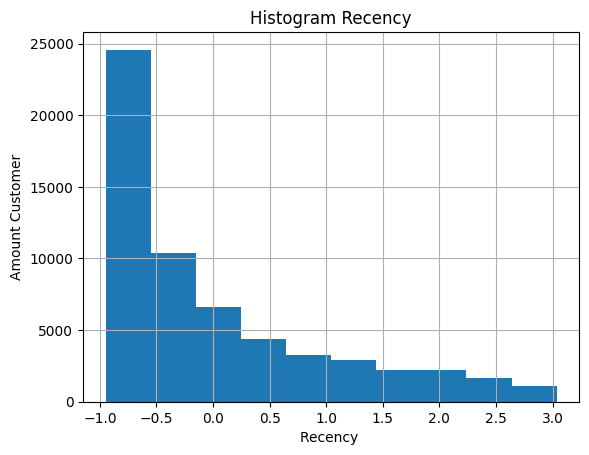

In [ ]:
data_rfm_2["Recency"] = data_rfm_2["LAST_TO_END"]
data_rfm_2["Recency"].hist()
plt.title("Histogram Recency")
plt.xlabel("Recency ")
plt.ylabel("Amount Customer")
plt.show()

In [ ]:
data_rfm_2["Recency"].describe()

count    5.923600e+04
mean     7.676875e-17
std      1.000008e+00
min     -9.485958e-01
25%     -7.957872e-01
50%     -3.755635e-01
75%      4.921712e-01
max      3.035343e+00
Name: Recency, dtype: float64

Text(0.5, 1.0, 'Boxplot Jumlah barang yang dibelanjakan customer')

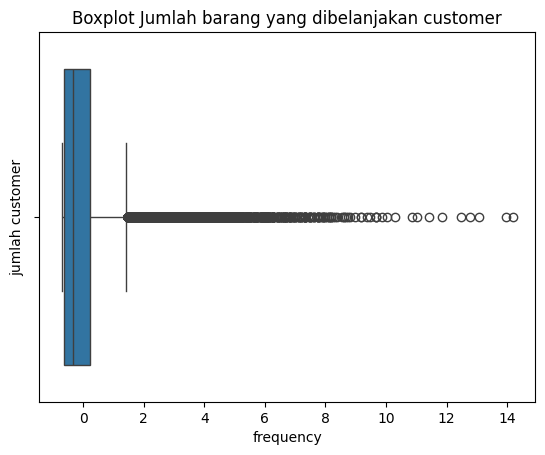

In [ ]:
sns.boxplot(data=data_rfm_2,
            x='FLIGHT_COUNT')
plt.xlabel("frequency")
plt.ylabel("jumlah customer")
plt.title("Boxplot Jumlah barang yang dibelanjakan customer")

Text(0.5, 1.0, 'Amount of Monetary Value')

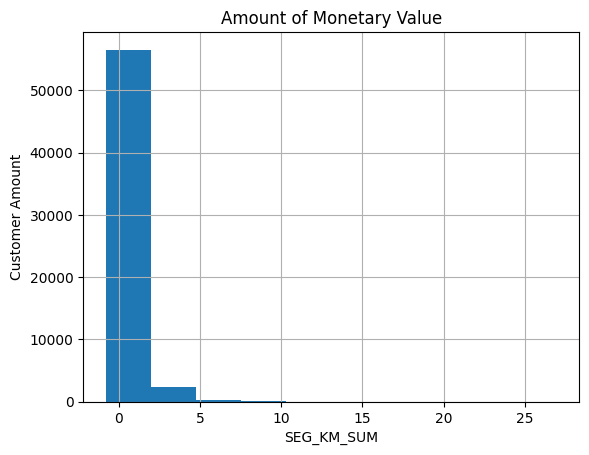

In [ ]:
data_rfm_2["SEG_KM_SUM"].hist()
plt.xlabel("SEG_KM_SUM")
plt.ylabel("Customer Amount")
plt.title("Amount of Monetary Value")

In [ ]:
data_rfm_2.head(10)

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,Recency
0,-0.948596,13.971573,26.963123,-0.948596
1,-0.894021,8.680715,12.752491,-0.894021
2,-0.424681,0.779700,12.638808,-0.424681
3,-0.926766,9.879976,14.006833,-0.926766
4,-0.522915,5.647290,13.272725,-0.522915
5,-0.948596,6.282193,12.911820,-0.948596
6,-0.937681,4.306939,12.920815,-0.937681
7,-0.872191,3.672036,17.123837,-0.872191
8,-0.833989,2.190595,11.714271,-0.833989
9,-0.921309,9.386163,12.165224,-0.921309


In [ ]:
data_rfm_2.tail(10)

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,Recency
59226,0.584948,-0.701740,-0.785755,0.584948
59227,1.114321,-0.701740,-0.786424,1.114321
59228,2.091204,-0.701740,-0.528436,2.091204
59229,0.017373,-0.701740,-0.718865,0.017373
59230,1.430853,-0.701740,-0.638005,1.430853
59231,0.666810,-0.701740,-0.767860,0.666810
59232,-0.468340,-0.560651,-0.438581,-0.468340
59233,-0.795787,-0.701740,-0.698004,-0.795787
59234,1.228927,-0.701740,-0.633890,1.228927
59235,1.245299,-0.701740,-0.620110,1.245299


In [ ]:
# Import additional package for Clustering Model
import seaborn as sns
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
# Convert naming to Recency, Frequency, MonetaryValue
data_rfm_final = data_rfm_2[['LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']]
data_rfm_final.columns = ['Recency','Frequency','MonetaryValue']
data_rfm_final.head()

,Recency,Frequency,MonetaryValue
0,-0.948596,13.971573,26.963123
1,-0.894021,8.680715,12.752491
2,-0.424681,0.779700,12.638808
3,-0.926766,9.879976,14.006833
4,-0.522915,5.647290,13.272725


In [ ]:
# Re-check and convert dataset naming to data_rfm
data_rfm = data_rfm_final[['Recency','Frequency','MonetaryValue']]
data_rfm

,Recency,Frequency,MonetaryValue
0,-0.948596,13.971573,26.963123
1,-0.894021,8.680715,12.752491
2,-0.424681,0.779700,12.638808
3,-0.926766,9.879976,14.006833
4,-0.522915,5.647290,13.272725
...,...,...,...
59231,0.666810,-0.701740,-0.767860
59232,-0.468340,-0.560651,-0.438581
59233,-0.795787,-0.701740,-0.698004
59234,1.228927,-0.701740,-0.633890


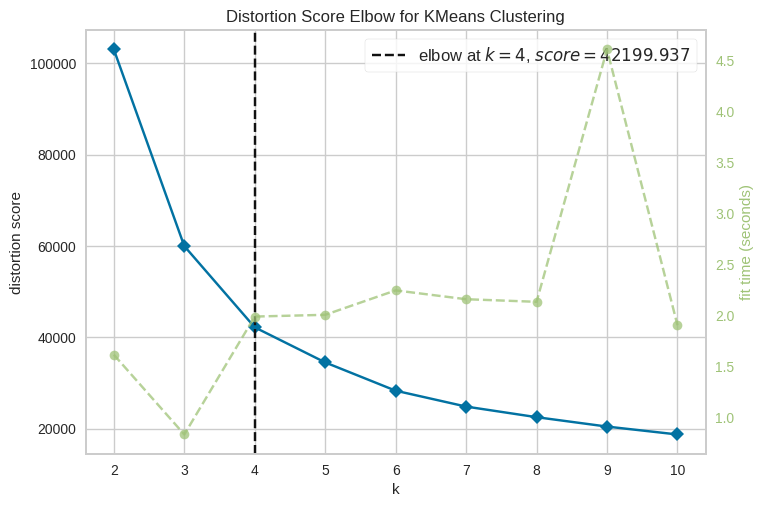

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Perform optimal clustering amount uisng Elbow
model_elbow = KElbowVisualizer(KMeans(random_state=1000), k=10)
model_elbow.fit(data_rfm)
model_elbow.show()

In [ ]:
kmeans_model = KMeans(
    n_clusters = 4, #4 dari evaluasi via score diatas
    random_state=42
)

kmeans_model.fit(data_rfm) #k-means dilatih kedalam data rfm diatas

KMeans(n_clusters=4, random_state=42)

In [ ]:
#Assign cluster to 'cluster' column
data_rfm['cluster_elbow'] = kmeans_model.labels_
data_rfm

,Recency,Frequency,MonetaryValue,cluster_elbow
0,-0.948596,13.971573,26.963123,1
1,-0.894021,8.680715,12.752491,1
2,-0.424681,0.779700,12.638808,1
3,-0.926766,9.879976,14.006833,1
4,-0.522915,5.647290,13.272725,1
...,...,...,...,...
59231,0.666810,-0.701740,-0.767860,2
59232,-0.468340,-0.560651,-0.438581,0
59233,-0.795787,-0.701740,-0.698004,0
59234,1.228927,-0.701740,-0.633890,2


# **Assignment 5. Visualization of each cluster and its RFM properties**


Text(0.5, 1.0, 'Total Customer for Each Segment')

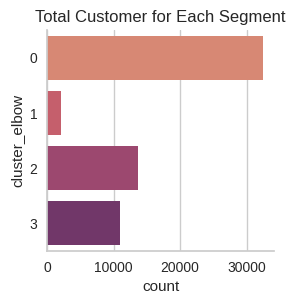

In [ ]:
sns.catplot(
    y = 'cluster_elbow',
    data = data_rfm,
    kind = 'count',
    palette = "flare",
    height = 3
).ax.set_title("Total Customer for Each Segment")

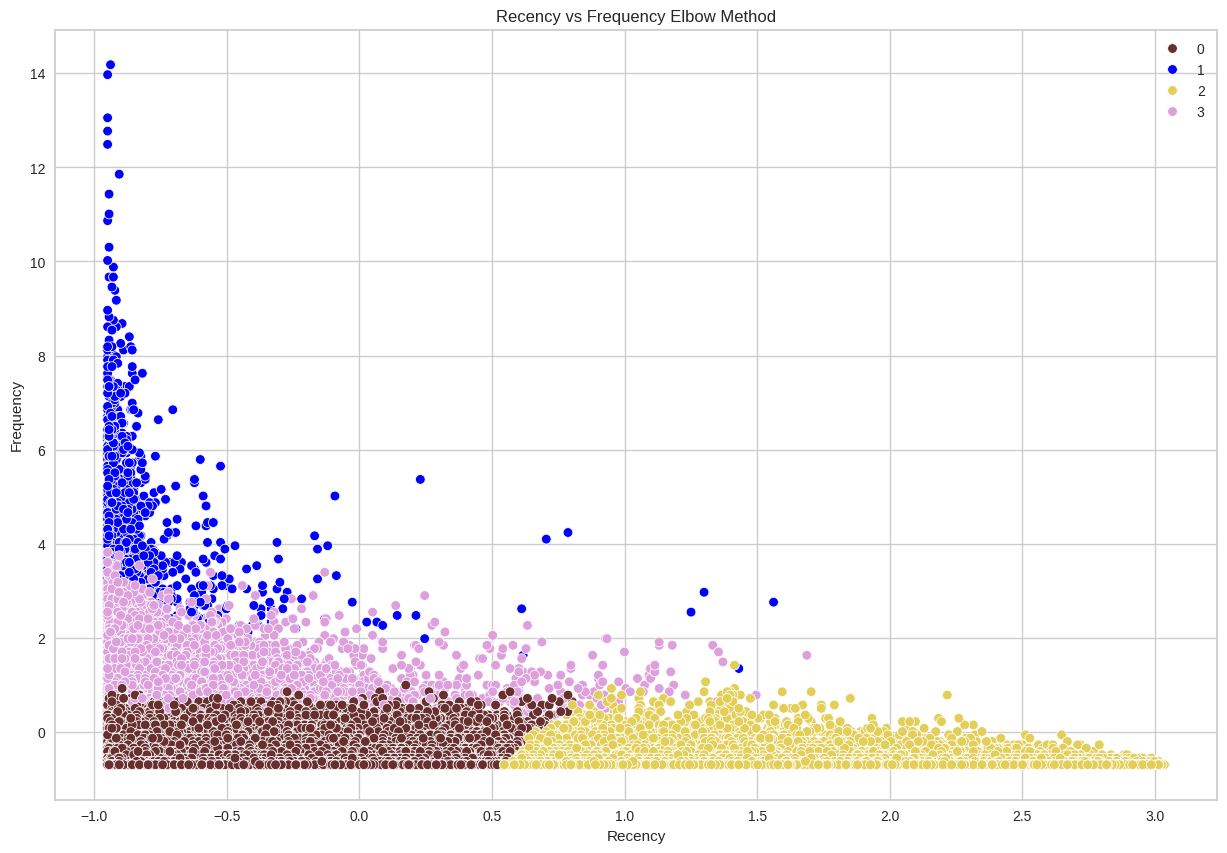

In [ ]:
#Recency VS Frequency
pal_elbow = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['Frequency'], hue = data_rfm["cluster_elbow"], palette= pal_elbow)
pl.set_title("Recency vs Frequency Elbow Method")
plt.legend()
plt.show()

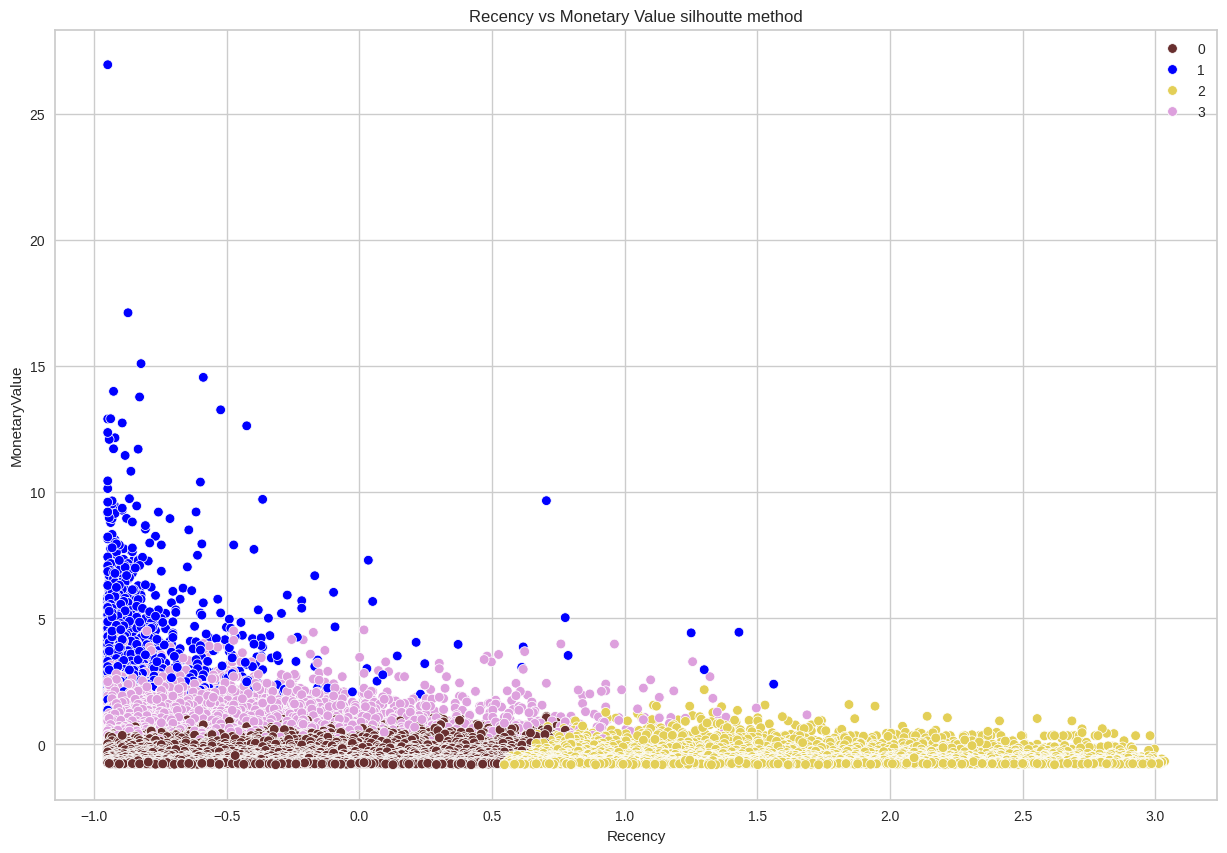

In [ ]:
#Recency vs Monetary Value
pal = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['MonetaryValue'], hue = data_rfm["cluster_elbow"], palette= pal)
pl.set_title("Recency vs Monetary Value silhoutte method")
plt.legend()
plt.show()

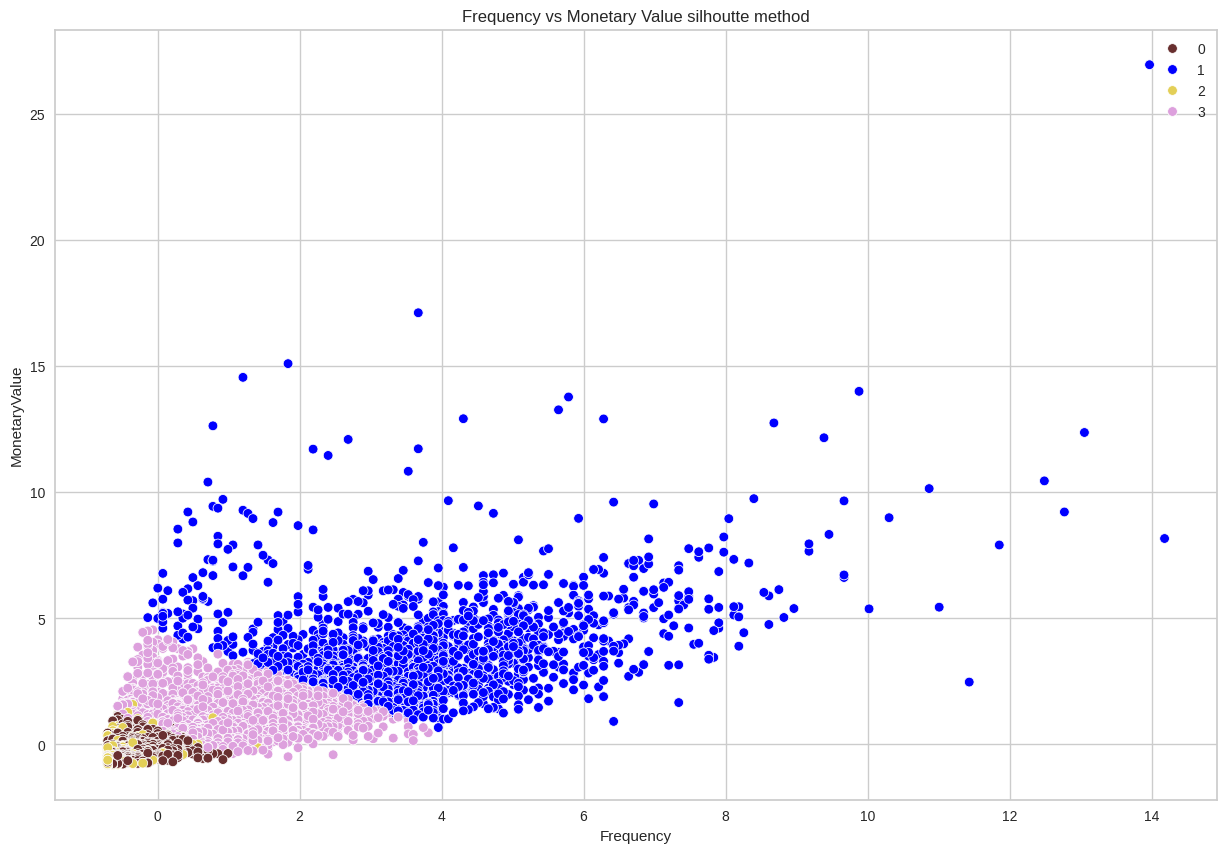

In [ ]:
#Frequency vs Monetary Value
pal = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Frequency"], y = data_rfm['MonetaryValue'], hue = data_rfm["cluster_elbow"], palette= pal)
pl.set_title("Frequency vs Monetary Value silhoutte method")
plt.legend()
plt.show()

In [ ]:
# Cluster 0
# Separate dataframes into each
df_cluster0 = data_rfm[data_rfm['cluster_elbow']==0]

df_cluster1 = data_rfm[data_rfm['cluster_elbow']==1]
df_cluster2 = data_rfm[data_rfm['cluster_elbow']==2]
df_cluster3 = data_rfm[data_rfm['cluster_elbow']==3]

In [ ]:
# List all the dataframes
# Select features of RFM
# Perform iteration to print out the statistics /description
clusters = [df_cluster0, df_cluster1, df_cluster2, df_cluster3]


selected_columns = ['Recency', 'Frequency', 'MonetaryValue']

for idx, cluster_df in enumerate(clusters):
    print(f"Describe Cluster {idx} for Selected Columns:")
    print(cluster_df[selected_columns].describe())
    print("\n")

Describe Cluster 0 for Selected Columns:
            Recency     Frequency  MonetaryValue
count  32481.000000  32481.000000   32481.000000
mean      -0.377355     -0.326071      -0.327680
std        0.437277      0.306155       0.309171
min       -0.948596     -0.701740      -0.804510
25%       -0.768500     -0.560651      -0.577670
50%       -0.457425     -0.419561      -0.387720
75%       -0.048116     -0.137382      -0.126335
max        0.803246      0.991334       1.199298


Describe Cluster 1 for Selected Columns:
           Recency    Frequency  MonetaryValue
count  2110.000000  2110.000000    2110.000000
mean     -0.847822     3.606138       3.568727
std       0.189699     1.612437       1.801841
min      -0.948596    -0.137382       0.669830
25%      -0.932223     2.613864       2.457756
50%      -0.904936     3.319312       3.111505
75%      -0.844904     4.306939       4.185885
max       1.561832    14.183208      26.963123


Describe Cluster 2 for Selected Columns:
         

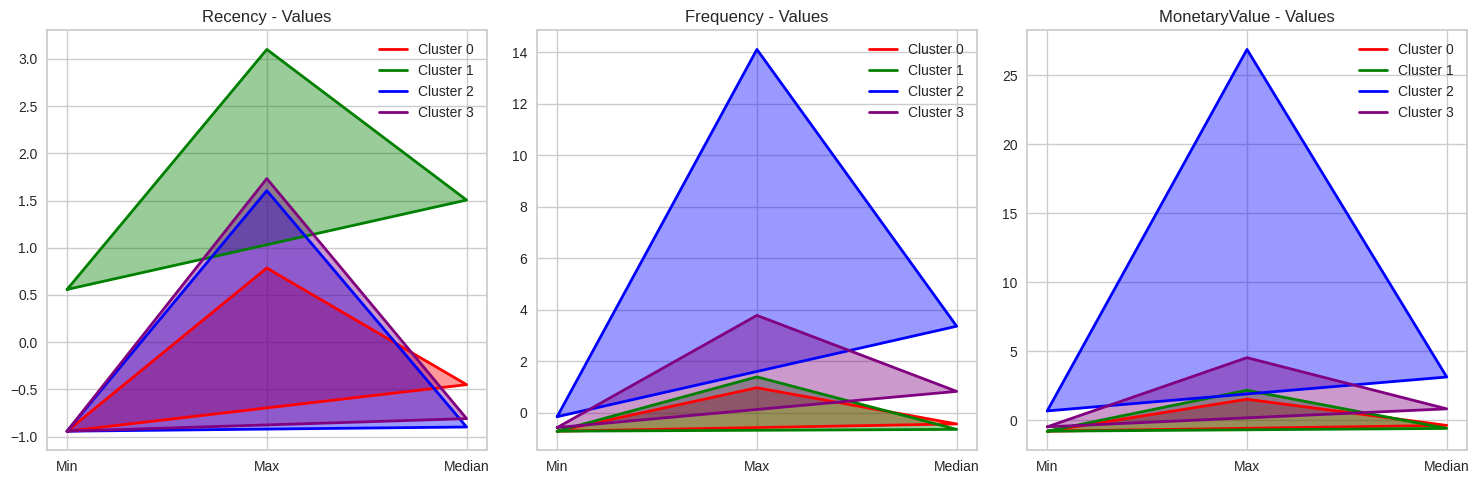

In [ ]:
# Fungsi untuk membuat radar plot
def radar_plot(ax, values, categories, title, cluster_label, color):
    num_vars = len(values)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Plot the values
    values += values[:1]
    angles += angles[:1]
    ax.plot(angles, values, label=f'Cluster {cluster_label}', linewidth=2, linestyle='solid', color=color)
    ax.fill(angles, values, alpha=0.4, color=color)

    # Labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(title)
    ax.legend()

# Plot radar plot untuk nilai min, max, median dari setiap kluster
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Warna yang berbeda untuk setiap kluster
colors = ['red', 'green', 'blue', 'purple']

for col_idx, column in enumerate(selected_columns):
    for cluster_idx, cluster_df in enumerate(clusters):
        values = [cluster_df[column].min(), cluster_df[column].max(), cluster_df[column].median()]
        radar_plot(axs[col_idx], values, ['Min', 'Max', 'Median'], f'{column} - Values', cluster_idx, color=colors[cluster_idx])

plt.tight_layout()
plt.show()

# **Summary Findings**

1.   There good number of cluster would be 4 (four clusters).
2.   Cluster "0" has the highest amount of members.
3.   Cluster "2" and "3" has the highest average (mean) value of Monetary.
4.   I could recommend the following naming of each group of customer :

*   Cluster 0 : **"LowValued"**
*   Cluster 1 : **"PromisingNew"**
*   Cluster 2 : **"HighValuedLoyal"**
*   Cluster 2 : **"LoyalMedium"**

5.  Recommendation

*   Cluster 0 : **"LowValued"** => Intensify marketing campaign for the group
*   Cluster 1 : **"PromisingNew"** => Intensify marketing campaign for the group
*   Cluster 2 : **"HighValuedLoyal"** => Maintain but improve recency for the group
*   Cluster 2 : **"LoyalMedium"** => Maintain the loyalty of these group







     


  
